In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/Concrete.csv", encoding='euc-kr')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)

In [4]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.6, random_state = 1234)

df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y
                                                               , test_size = 0.5, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data Y size : (309,)
test data X size : (309, 8)
test data X size : (309,)


In [5]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

# validation 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_validation_x, df_validation_y)))

# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))


Score on training set: 0.949
Score on test set: 0.903
Score on test set: 0.900


### 모델 Parameter 조정
- n_estimators: 트리 수 변경에 따른 모델 성능

   Estimators  TrainScore  Validation
0          10       0.635       0.617
1          20       0.800       0.780
2          30       0.863       0.844
3          40       0.893       0.866
4          50       0.911       0.876
5          60       0.922       0.884
6          70       0.931       0.890
7          80       0.938       0.893
8          90       0.944       0.898
9         100       0.949       0.900


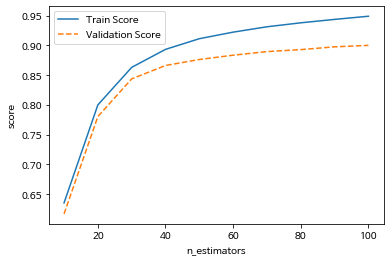

In [6]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)] #참조: para_n_tree: [10,20,30,...,100]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["Estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["Validation"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

# min_samples_leaf: 잎사귀 노드의 최소 자료 수변경에 따른 모델 성능

    MinSamplesLeaf  TrainScore  ValidationScore
0                1       0.893            0.866
1                2       0.894            0.867
2                3       0.893            0.863
3                4       0.893            0.867
4                5       0.890            0.863
5                6       0.888            0.867
6                7       0.888            0.866
7                8       0.887            0.861
8                9       0.888            0.861
9               10       0.883            0.857
10              11       0.882            0.857
11              12       0.880            0.856
12              13       0.882            0.855
13              14       0.880            0.854
14              15       0.881            0.855
15              16       0.877            0.851
16              17       0.877            0.855
17              18       0.877            0.856
18              19       0.879            0.860
19              20       0.878          

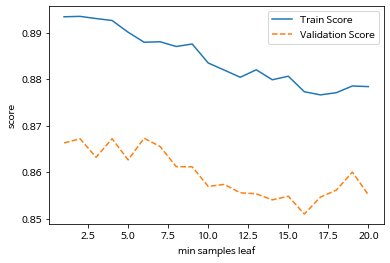

In [7]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)] #참조: para_leaf: [1,2,3,...,20]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 40,
                               min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

    MinSamplesSplit  TrainScore  ValidationScore
0                 2       0.888            0.861
1                 4       0.888            0.861
2                 6       0.888            0.861
3                 8       0.888            0.861
4                10       0.888            0.861
5                12       0.888            0.861
6                14       0.888            0.861
7                16       0.888            0.861
8                18       0.888            0.861
9                20       0.885            0.860
10               22       0.885            0.860
11               24       0.883            0.863
12               26       0.882            0.860
13               28       0.885            0.862
14               30       0.883            0.860
15               32       0.883            0.860
16               34       0.883            0.862
17               36       0.881            0.861
18               38       0.881            0.861
19               40 

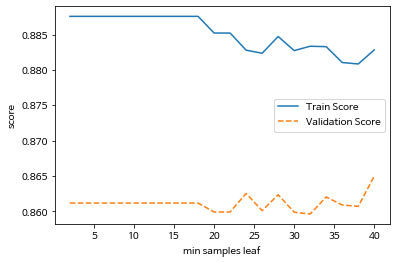

In [8]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(1,21)] #참조: para_leaf: [4,6,8,...,40]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 40, min_samples_leaf = 9,
                               min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = test_score
# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# max_depth: 최대 깊이 변경에 따른 모델 성능

   Depth  TrainScore  ValidationScore
0      1       0.651            0.651
1      2       0.832            0.831
2      3       0.886            0.861
3      4       0.930            0.888
4      5       0.952            0.894
5      6       0.965            0.899
6      7       0.970            0.895
7      8       0.973            0.890
8      9       0.975            0.894
9     10       0.976            0.895


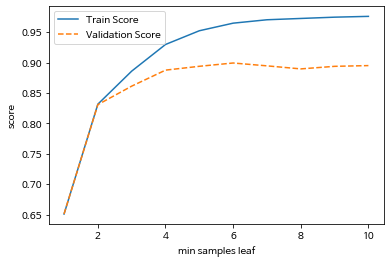

In [9]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [n_depth for n_depth in range(1,11)] # 참조: para+depth:[1,2,3, ...,10]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 40, 
                               min_samples_leaf = 8, min_samples_split = 18,
                               max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인: 4개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# learning_rate: 학습률 변경에 따른 모델 성능

   LearningRate  TrainScore  ValidationScore
0           0.1       0.970            0.895
1           0.2       0.983            0.897
2           0.3       0.988            0.907
3           0.4       0.989            0.903
4           0.5       0.991            0.908
5           0.6       0.992            0.896
6           0.7       0.993            0.883
7           0.8       0.993            0.872
8           0.9       0.993            0.855
9           1.0       0.993            0.820


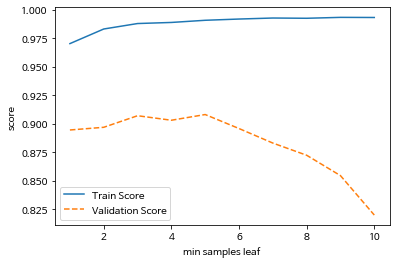

In [10]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# learning rate: 학습률 변경 -.1 ~0.9
para_lr = [lr * 0.1 for lr in range(1,11)] # 참조: para+depth:[0.1,0.2,0.3, ...,0.9]


for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 40, 
                               min_samples_leaf = 8, min_samples_split = 18,
                               max_depth = 7, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["LearningRate"] = para_lr
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))


# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()


# 결론 도출
- 최종 모델 생성

In [11]:
gb_final = GradientBoostingRegressor(random_state = 1234, n_estimators = 40, min_samples_leaf = 8, 
                                     min_samples_split = 28, max_depth = 7, learning_rate = 0.5)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on Validation set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))  

Score on training set: 0.988
Score on Validation set: 0.901


# feature_importances_: 설명변수 중요도

              Feature  Importance
7                 AGE       0.319
0              CEMENT       0.292
3               WATER       0.170
4    SUPERPLASTICIZER       0.079
1  BLAST_FURNACE_SLAG       0.069
6      FINE_AGGREGATE       0.045
5    COARSE_AGGREGATE       0.015
2             FLY_ASH       0.013


Text(0, 0.5, '변수')

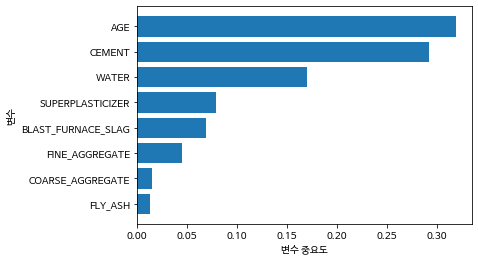

In [12]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
print(df_importance.round(3))

# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [13]:
predict_y = gb_final.predict(df_test_x)

MSE = mean_squared_error(df_test_y, predict_y)
MAE = mean_absolute_error(df_test_y, predict_y)
print("MSE: {:.3f}".format(MSE))
print("MAE: {:.3f}".format(MAE))

MSE: 28.073
MAE: 3.827


# GridSearchCV를 이용한 최적 parameter 찾기

In [31]:
estimator = GradientBoostingRegressor(random_state = 1234)
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],"learning_rate": para_lr,
                            "max_depth": para_depth, "min_samples_leaf": para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=6,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

best parameter: 
{'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 20}

best score: 
0.855


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
